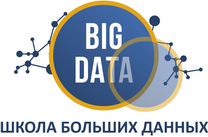

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

### Подгружаем данные

In [1]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()

In [9]:
# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)

print(type(diabetes['data']))

<class 'pandas.core.frame.DataFrame'>


In [3]:
diabetes['data'].columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [4]:
print(list(diabetes))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename']


In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
print(diabetes['data'])

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [10]:
print(diabetes['target'][:20])

0     151.0
1      75.0
2     141.0
3     206.0
4     135.0
5      97.0
6     138.0
7      63.0
8     110.0
9     310.0
10    101.0
11     69.0
12    179.0
13    185.0
14    118.0
15    171.0
16    166.0
17    144.0
18     97.0
19    168.0
Name: target, dtype: float64


### Посмотрим на данные повнимательнее

In [11]:
import seaborn as sns

In [12]:
type(diabetes['data'])

pandas.core.frame.DataFrame

In [13]:
df_diabetes = diabetes['data']
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
df_diabetes['target'] = diabetes['target']

#### Корреляционная матрица

<AxesSubplot:>

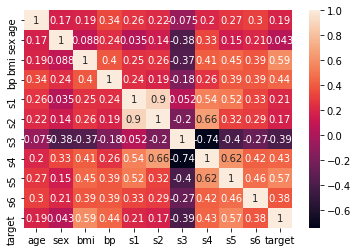

In [15]:
sns.heatmap(df_diabetes.corr(), annot = True)

#### Зависимости пар столбцов

<AxesSubplot:xlabel='bp', ylabel='target'>

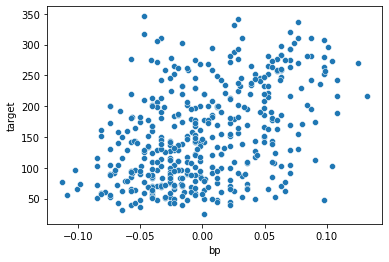

In [16]:
sns.scatterplot(data=df_diabetes, x="bp", y="target")

<AxesSubplot:xlabel='age', ylabel='target'>

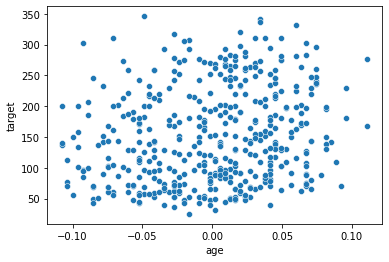

In [17]:
sns.scatterplot(data=df_diabetes, x="age", y="target")

<AxesSubplot:xlabel='s4', ylabel='target'>

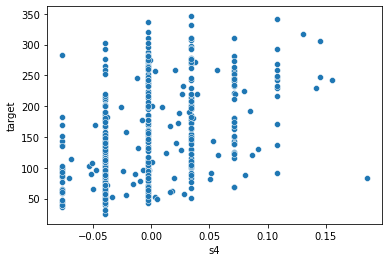

In [18]:
sns.scatterplot(data=df_diabetes, x="s4", y="target")

<AxesSubplot:xlabel='s5', ylabel='target'>

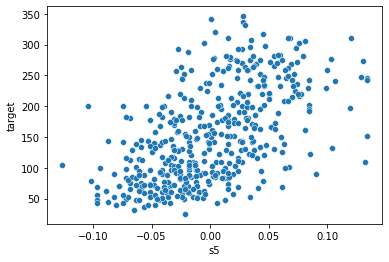

In [19]:
sns.scatterplot(data=df_diabetes, x="s5", y="target")

<AxesSubplot:xlabel='s3', ylabel='target'>

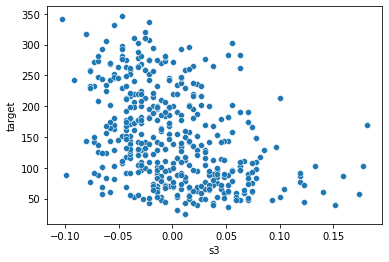

In [21]:
sns.scatterplot(data=df_diabetes, x="s3", y="target")

### Строим модель

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [54]:
X_train, X_test, y_train , y_test = train_test_split(diabetes['data'].drop(['target'], axis=1), diabetes['target'], test_size=0.25)


In [55]:
reg = LinearRegression().fit(X_train, y_train)

In [56]:
y_prediction = reg.predict(X_test)

In [57]:
mean_absolute_error(y_test,y_prediction)

45.395680608264286

#### Выбросим сильно скоррелированные фичи

In [58]:
reg = LinearRegression().fit(X_train.drop(['s3','s2'], axis=1), y_train) # + 's4'

In [59]:
y_prediction = reg.predict(X_test.drop(['s3','s2'], axis=1))
mean_absolute_error(y_test,y_prediction)

45.26634552649444

### Еще модель

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
regrforest = RandomForestRegressor()

In [62]:
regrforest.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_prediction = regrforest.predict(X_test)

In [64]:
mean_absolute_error(y_test,y_prediction)

45.631441441441446

### И еще модель

In [65]:
from catboost import CatBoostRegressor

In [66]:
catboostreg = CatBoostRegressor(iterations=500)

In [67]:
catboostreg.fit(X_train, y_train)

Learning rate set to 0.060402
0:	learn: 74.7027259	total: 54.8ms	remaining: 27.3s
1:	learn: 73.1482433	total: 55.7ms	remaining: 13.9s
2:	learn: 71.4489661	total: 56.5ms	remaining: 9.36s
3:	learn: 70.0444429	total: 57.3ms	remaining: 7.11s
4:	learn: 68.7118244	total: 58.2ms	remaining: 5.76s
5:	learn: 67.2448490	total: 59.1ms	remaining: 4.86s
6:	learn: 65.9337425	total: 59.8ms	remaining: 4.21s
7:	learn: 64.8729575	total: 60.5ms	remaining: 3.72s
8:	learn: 63.5891659	total: 61.3ms	remaining: 3.35s
9:	learn: 62.5160976	total: 62.3ms	remaining: 3.05s
10:	learn: 61.5717613	total: 63.3ms	remaining: 2.81s
11:	learn: 60.6220718	total: 64ms	remaining: 2.6s
12:	learn: 59.7748281	total: 64.8ms	remaining: 2.43s
13:	learn: 59.0248493	total: 65.4ms	remaining: 2.27s
14:	learn: 58.3071297	total: 66.1ms	remaining: 2.14s
15:	learn: 57.5202547	total: 66.7ms	remaining: 2.02s
16:	learn: 56.9949059	total: 67.6ms	remaining: 1.92s
17:	learn: 56.3060721	total: 68.3ms	remaining: 1.83s
18:	learn: 55.8119305	total: 

In [68]:
y_prediction = catboostreg.predict(X_test)

In [69]:
mean_absolute_error(y_test,y_prediction)

45.45722284326582

### Сравним со средним

In [71]:
y_train.mean()

148.5740181268882

In [72]:
mean_absolute_error(y_test,[y_train.mean()]*len(X_test))

66.36653874418225

### Сохраняем модель

In [73]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(regrforest, f)

In [74]:
with open("model.pkl", "rb") as f:
    model_forest = pickle.load(f)
mean_absolute_error(y_test,model_forest.predict(X_test))

45.631441441441446

### Подготовим данные для кафки

In [75]:
# Load the dataset
diabetes['data'].iloc[0]

age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019908
s6         -0.017646
target    151.000000
Name: 0, dtype: float64

In [76]:
dict(diabetes['data'].iloc[0])

{'age': 0.0380759064334241,
 'sex': 0.0506801187398187,
 'bmi': 0.0616962065186885,
 'bp': 0.0218723549949558,
 's1': -0.0442234984244464,
 's2': -0.0348207628376986,
 's3': -0.0434008456520269,
 's4': -0.00259226199818282,
 's5': 0.0199084208763183,
 's6': -0.0176461251598052,
 'target': 151.0}